In [4]:
%%bash
mkdir /github/
cd /github/
git clone --depth=1 https://github.com/rushter/MLAlgorithms
cd MLAlgorithms
pip install -U -r requirements.txt
pip install .

Process is interrupted.


In [5]:
%%bash
cd /space/dl/

In [1]:
import logging

try:
    from sklearn.model_selection import train_test_split
except ImportError:
    from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn.datasets import make_regression

from mla.linear_models import LinearRegression, LogisticRegression
from mla.metrics.metrics import mean_squared_error, accuracy

import numpy as np

In [2]:
logging.basicConfig(level=logging.DEBUG)

In [3]:
def regression():
    # Generate a random regression problem
    X, y = make_regression(n_samples=10000, n_features=100,
                           n_informative=75, n_targets=1, noise=0.05,
                           random_state=1111, bias=0.5)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                        random_state=1111)

    model = LinearRegression(lr=0.01, max_iters=2000, penalty='l2', C=0.03)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('regression mse', mean_squared_error(y_test, predictions))

In [4]:
regression()

('regression mse', 0.01429975794957565)


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
X, y = make_regression(n_samples=100, n_features=2,
                           n_informative=75, n_targets=1, noise=0.05,
                           random_state=1928, bias=0.5)

In [7]:
X_trans = np.transpose(X)
[X_trans.shape, y.shape]

[(2, 100), (100,)]

In [8]:
model = LinearRegression(lr=0.01, max_iters=200000, penalty='l2', C=0.03)
model.fit(X, y)
y_predict = model.predict(X)
print('regression mse', mean_squared_error(y, y_predict))

('regression mse', 0.029520264927707082)


In [9]:
# adapted from http://stackoverflow.com/a/25628397/200764
# see also http://matplotlib.org/users/colormaps.html
import matplotlib.cm as cmx
import matplotlib.colors as colors

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='rainbow') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color

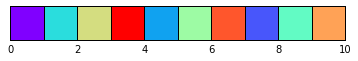

In [10]:
from itertools import cycle

def cycolor(N):
    cmap = get_cmap(N)
    i = 0
    while True:
        index = i
        yield cmap(index)
        i = (i + 3) % N

N = 10
cycol=cycolor(N).next
        
fig=plt.figure()
ax=fig.add_subplot(111)   
plt.axis('scaled')
ax.set_xlim([ 0, N])
ax.set_ylim([-0.5, 0.5])
for i in xrange(N):
    col = cycol()
    rect = plt.Rectangle((i, -0.5), 1, 1, facecolor=col)
    ax.add_artist(rect)
ax.set_yticks([])
plt.show()

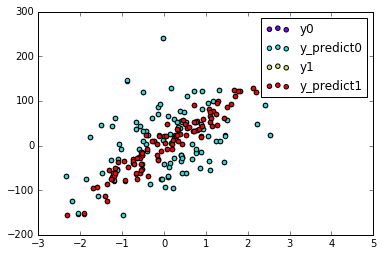

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
for i in xrange(len(X_trans)):
    ax.scatter(X_trans[i], y, c=cycol(), label='y%d' % i)
    ax.scatter(X_trans[i], y_predict, c=cycol(), label='y_predict%d' % i)
ax.legend()

In [12]:
is_close = np.isclose(y, y_predict, rtol=0.005)
not_close = np.logical_not(is_close)
is_close

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True, False,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
        True, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,  True], dtype=bool)

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:806: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


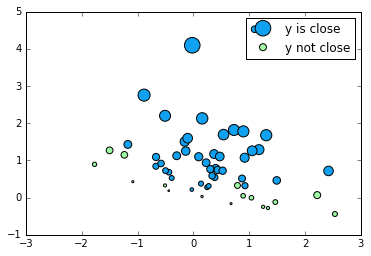

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_trans[0][is_close], X_trans[1][is_close], c=cycol(), s=y[is_close], label='y is close')
ax.scatter(X_trans[0][not_close], X_trans[1][not_close], c=cycol(), s=y[not_close], label='y not close')
ax.legend()

[(100,), (100,), (100,), (100,)]

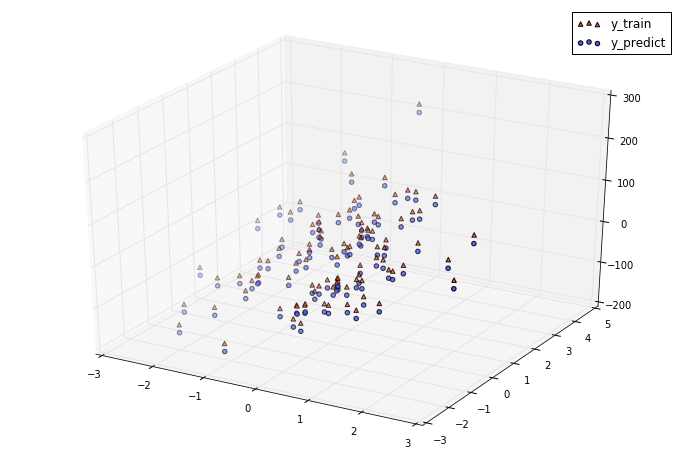

In [14]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
ax.scatter(X_trans[0], X_trans[1], y, label='y_train', marker='^', c=cycol())
ax.scatter(X_trans[0], X_trans[1], y_predict - 20, label='y_predict', marker='o', c=cycol())
ax.legend()
[X_trans[0].shape, X_trans[1].shape, y.shape, y_predict.shape]

In [15]:
def classification():
    # Generate a random binary classification problem.
    X, y = make_classification(n_samples=1000, n_features=100,
                               n_informative=75, random_state=1111,
                               n_classes=2, class_sep=2.5, )
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                        random_state=1111)

    model = LogisticRegression(lr=0.01, max_iters=500, penalty='l1', C=0.01)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print('classification accuracy', accuracy(y_test, predictions))

In [16]:
classification()

('classification accuracy', 0.94999999999999996)


/usr/local/lib/python2.7/dist-packages/autograd/core.py:134: RuntimeWarning: overflow encountered in cosh
  result = self.fun(*argvals, **kwargs)
/usr/local/lib/python2.7/dist-packages/autograd/numpy/numpy_grads.py:138: RuntimeWarning: overflow encountered in square
  anp.tanh.defgrad(  lambda ans, x : lambda g : g / anp.cosh(x) **2)


In [17]:
X, y = make_classification(n_samples=1000, n_features=2,
                               n_informative=2, n_redundant=0, random_state=1111,
                               n_classes=2, class_sep=2.5, )

In [18]:
X_trans = np.transpose(X)
[X_trans.shape, y.shape]

[(2, 1000), (1000,)]

In [19]:
model = LogisticRegression(lr=0.01, max_iters=1, penalty='l1', C=0.01)
model.fit(X, y)
y_predict = model.predict(X)
print('classification accuracy', accuracy(y, y_predict))

('classification accuracy', 0.99099999999999999)


In [20]:
is_close = np.isclose(y, y_predict)
not_close = np.logical_not(is_close)

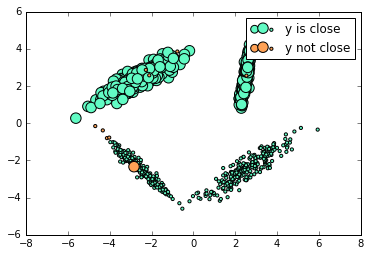

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_trans[0][is_close], X_trans[1][is_close], c=cycol(), s=(y[is_close] + 0.1) * 100, label='y is close')
ax.scatter(X_trans[0][not_close], X_trans[1][not_close], c=cycol(), s=(y[not_close] + 0.1) * 100, label='y not close')
ax.legend()

[(1000,), (1000,), (1000,), (1000,)]

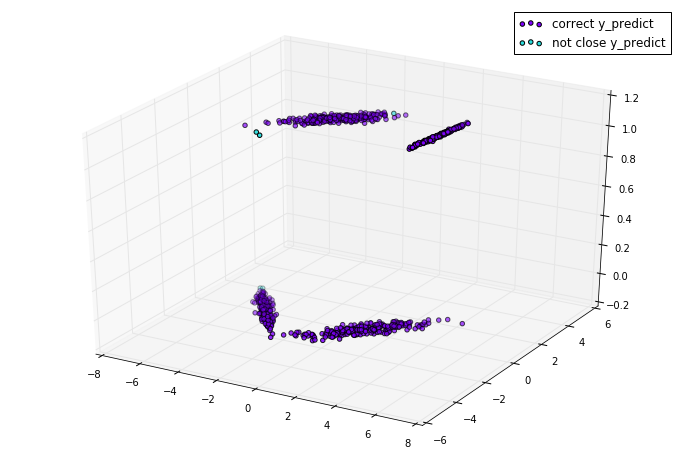

In [22]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
# ax.scatter(X_trans[0], X_trans[1], y, label='y_train', marker='^', c=cycol())
ax.scatter(X_trans[0][is_close], X_trans[1][is_close], y_predict[is_close], label='correct y_predict', marker='o', c=cycol())
ax.scatter(X_trans[0][not_close], X_trans[1][not_close], y_predict[not_close], label='not close y_predict', marker='o', c=cycol())
ax.legend()
[X_trans[0].shape, X_trans[1].shape, y.shape, y_predict.shape]

In [23]:
X, y = make_classification(n_samples=1000, n_features=2,
                               n_informative=2, n_redundant=0, random_state=1111,
                               n_classes=2, class_sep=2.5, )

In [24]:
X_trans = np.transpose(X)
[X_trans.shape, y.shape]

[(2, 1000), (1000,)]

In [25]:
model = LogisticRegression(lr=0.01, max_iters=1000, penalty='l1', C=0.01)
model.fit(X, y)
y_predict = model.predict(X)
print('classification accuracy', accuracy(y, y_predict))

('classification accuracy', 0.96499999999999997)


In [26]:
is_close = np.isclose(y, y_predict)
not_close = np.logical_not(is_close)

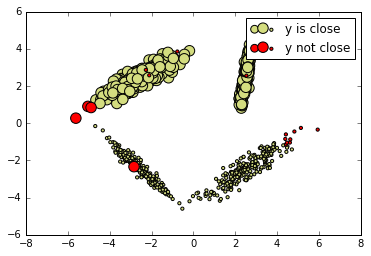

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_trans[0][is_close], X_trans[1][is_close], c=cycol(), s=(y[is_close] + 0.1) * 100, label='y is close')
ax.scatter(X_trans[0][not_close], X_trans[1][not_close], c=cycol(), s=(y[not_close] + 0.1) * 100, label='y not close')
ax.legend()

[(1000,), (1000,), (1000,), (1000,)]

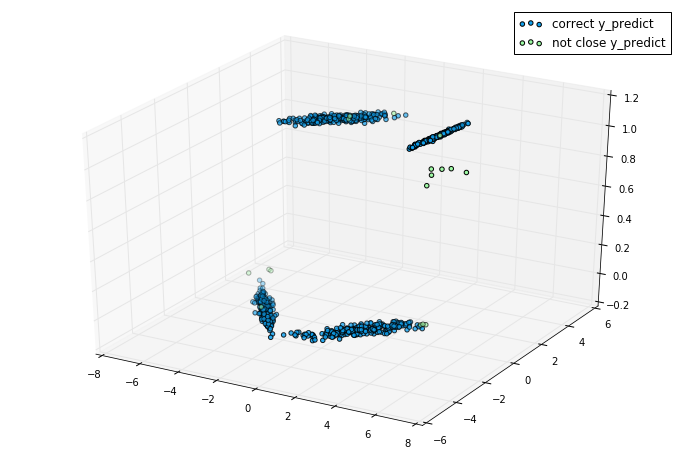

In [28]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
# ax.scatter(X_trans[0], X_trans[1], y, label='y_train', marker='^', c=cycol())
ax.scatter(X_trans[0][is_close], X_trans[1][is_close], y_predict[is_close], label='correct y_predict', marker='o', c=cycol())
ax.scatter(X_trans[0][not_close], X_trans[1][not_close], y_predict[not_close], label='not close y_predict', marker='o', c=cycol())
ax.legend()
[X_trans[0].shape, X_trans[1].shape, y.shape, y_predict.shape]